In [65]:

#import required python packages
import pandas as pd
import numpy as np
import glob,os
import matplotlib.dates as mdates

#to plot in the notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

#download the data and import into df
import pandas_datareader as pdr
from datetime import datetime
import statsmodels.regression.linear_model as rg
#import arch.unitroot as at

We need to extract various types of Crypto Currencies for this project. The best ones can be found from the source given below various Cryptocurrencies are taken into the dataframes using pandas_datareader.

Source: https://finance.yahoo.com/news/top-10-cryptocurrencies-market-capitalisation-160046487.html

The above article analyses the top 10 cryptocurrencies by market capitalisation.

Beginning with the largest, the top 10 are currently Bitcoin ($BTC), Ethereum ($ETH), XRP ($XRP), Tether ($USDT), Bitcoin Cash ($BCH) , Litecoin ($LTC), EOS ($EOS), Binance Coin ($BNB), Bitcoin SV ($BSV) and Tezos ($XTZ).

Bitcoin (BTC) $128bn

Ethereum (ETH) $19.4bn

XRP (XRP) $8.22bn

Tether (USDT) $6.4bn

Bitcoin Cash (BCH) $4.1bn

Bitcoin SV (BSV) $3.4bn

Litecoin (LTC) $2.6bn

EOS (EOS) $2.4bn

Binance Coin (BNB) $2.4bn

Tezos (XTZ) $1.5bn

In [66]:
## Downloading and assembling the data for the project 

curr = ['BTC-USD','ETH-USD','XRP-USD','BCH-USD','USDT-USD','BSV-USD', 'LTC-USD','EOS-USD','BNB-USD','XTZ-USD']

BTC = pdr.get_data_yahoo(symbols='BTC-USD', start=datetime(2019, 1, 1), end=datetime(2021, 1, 1))
ETH = pdr.get_data_yahoo(symbols='ETH-USD', start=datetime(2019, 1, 1), end=datetime(2021, 1, 1))
XRP = pdr.get_data_yahoo(symbols='XRP-USD', start=datetime(2019, 1, 1), end=datetime(2021, 1, 1))
BCH = pdr.get_data_yahoo(symbols='BCH-USD', start=datetime(2019, 1, 1), end=datetime(2021, 1, 1))
USDT = pdr.get_data_yahoo(symbols='USDT-USD', start=datetime(2019, 1, 1), end=datetime(2021, 1, 1))
LTC = pdr.get_data_yahoo(symbols='LTC-USD', start=datetime(2019, 1, 1), end=datetime(2021, 1, 1))
EOS = pdr.get_data_yahoo(symbols='EOS-USD', start=datetime(2019, 1, 1), end=datetime(2021, 1, 1))
BNB = pdr.get_data_yahoo(symbols='BNB-USD', start=datetime(2019, 1, 1), end=datetime(2021, 1, 1))

data= pd.concat([BTC['Adj Close'],ETH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,XRP['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BCH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,USDT['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,LTC['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,EOS['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BNB['Adj Close']], ignore_index=True,axis=1)


data.columns = [ 'BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ']

data.head()

,BTC_ADJ,ETH_ADJ,XRP_ADJ,BCH_ADJ,USDT_ADJ,LTC_ADJ,EOS_ADJ,BNB_ADJ
Date,,,,,,,,
2019-01-01,3843.520020,140.819412,0.364771,164.854599,1.018335,31.979931,2.663533,6.075273
2019-01-02,3943.409424,155.047684,0.375243,171.827377,1.024012,33.433681,2.887629,6.188613
2019-01-03,3836.741211,149.135010,0.360224,162.049927,1.019473,32.026699,2.681411,5.903535
2019-01-04,3857.717529,154.581940,0.356747,161.395630,1.017200,32.404167,2.721645,6.065138
2019-01-05,3845.194580,155.638596,0.355275,160.401215,1.018489,34.936867,2.699468,6.065543


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


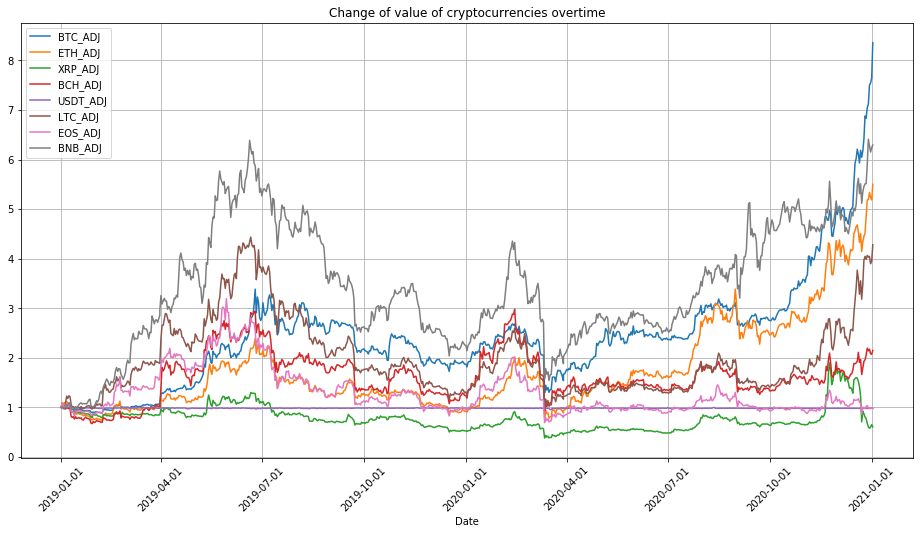

In [67]:
# We need to normalize the values to project them on a visualization plot for better understanding of the datd

prices_norm = data.divide(data.iloc[0]) # divide them with the highest which is BTC

curr = ['BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ']

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
ax = plt.axes()
plt.plot(prices_norm)
plt.title('Change of value of cryptocurrencies overtime')
plt.legend(curr)
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)

plt.show()

We can observe that some currencies performed well compared to others. Almost all the currencies values fell when the Corona Pandemic started in March in USA. But later in August this year all the currencies values increased drastically.

In [68]:
#Normalizing the dataframe and get percentage change values 
data=pd.DataFrame(data)

def normalize_series(data):
    #take tail to drop head NA
    return data.pct_change(1).dropna()
dt=normalize_series(data)

#remove first row with NAs
dt=dt.tail(len(dt)-1)
dt.columns = [ 'BTC_RET','ETH_RET','XRP_RET','BCH_RET','USDT_RET','LTC_RET','EOS_RET','BNB_RET']
dt['BTC_RET'].head()

Date
2019-01-03   -0.027050
2019-01-04    0.005467
2019-01-05   -0.003246
2019-01-06    0.060189
2019-01-07   -0.012605
Name: BTC_RET, dtype: float64

In [69]:
# Normalizing to get the cumulative returns in a  datafrme 
def normalize_and_accumulate_series(data):
    #take tail to drop head NA
    return data.pct_change(1).cumsum().dropna()
dtc =normalize_and_accumulate_series(data)


#remove first row with NAs
dtc = dtc.tail(len(dt)-1)
dtc.columns = [ 'BTC_C.RET','ETH_C.RET','XRP_C.RET','BCH_C.RET','USDT_C.RET','LTC_C.RET','EOS_C.RET','BNB_C.RET']
dtc['BTC_C.RET'].head()

Date
2019-01-04    0.004407
2019-01-05    0.001160
2019-01-06    0.061349
2019-01-07    0.048745
2019-01-08    0.050136
Name: BTC_C.RET, dtype: float64

In [70]:
dt.describe()

,BTC_RET,ETH_RET,XRP_RET,BCH_RET,USDT_RET,LTC_RET,EOS_RET,BNB_RET
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,0.003594,0.003297,0.000551,0.002476,-0.000020,0.003198,0.001183,0.003592
std,0.036909,0.045485,0.050284,0.054182,0.004837,0.050041,0.050516,0.045641
min,-0.371695,-0.423472,-0.423340,-0.429560,-0.051212,-0.361773,-0.396028,-0.419046
25%,-0.011061,-0.016896,-0.017453,-0.019818,-0.001913,-0.022223,-0.017927,-0.018227
50%,0.001808,0.001577,-0.001056,-0.000482,-0.000124,0.000823,0.001022,0.001429
75%,0.017129,0.024524,0.016510,0.023060,0.001765,0.024851,0.019884,0.027567
max,0.181878,0.189404,0.397101,0.408679,0.054845,0.308295,0.231599,0.213507


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


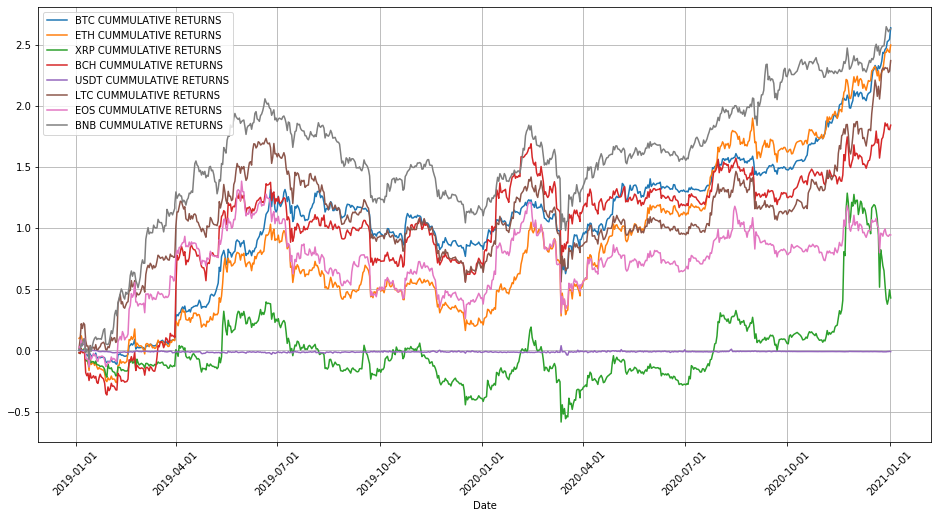

In [71]:
# The Cummulative returns Plot to get the data based on rate of change

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
ax = plt.axes()
plt.plot(dtc['BTC_C.RET'],label='BTC CUMMULATIVE RETURNS')
plt.plot(dtc['ETH_C.RET'],label='ETH CUMMULATIVE RETURNS')
plt.plot(dtc['XRP_C.RET'],label='XRP CUMMULATIVE RETURNS')
plt.plot(dtc['BCH_C.RET'],label='BCH CUMMULATIVE RETURNS')
plt.plot(dtc['USDT_C.RET'],label='USDT CUMMULATIVE RETURNS')
plt.plot(dtc['LTC_C.RET'],label='LTC CUMMULATIVE RETURNS')
plt.plot(dtc['EOS_C.RET'],label='EOS CUMMULATIVE RETURNS')
plt.plot(dtc['BNB_C.RET'],label='BNB CUMMULATIVE RETURNS')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)
plt.legend(loc='best')
plt.show()

Two main criteria that would determine the desired pair are the correlation value and Cointegration. The pair with the highest correlation, is the desired pair. High positive correlation means that the returns of both currencies are going towards same direction. Conintegration values should be low for a desired value. values less than 0.05 are better.

First we attempted to get the p-value of all possible pair in our selected

In [72]:
#obtaining the P-value for every possible pair within our selected
#for cointegration test

# A p-value is a measure of the probability that an observed difference could have occurred just by random chance.
# The lower the p-value, the greater the statistical significance of the observed difference.
from statsmodels.tsa.stattools import coint
import scipy

#co- integration test
for p1 in dt.columns:
    
    for p2 in dt.columns:
        
        if p1 != p2:
            test_result = coint(dt[p1], dt[p2])
            #print(test_result)
            print(p1 + ' and ' + p2 + ': p-value = ' + str(test_result[1]))
            

BTC_RET and ETH_RET: p-value = 0.0
BTC_RET and XRP_RET: p-value = 2.7448831853310576e-29
BTC_RET and BCH_RET: p-value = 0.0
BTC_RET and USDT_RET: p-value = 0.0
BTC_RET and LTC_RET: p-value = 0.0
BTC_RET and EOS_RET: p-value = 0.0
BTC_RET and BNB_RET: p-value = 0.0
ETH_RET and BTC_RET: p-value = 0.0
ETH_RET and XRP_RET: p-value = 3.724619659298252e-10
ETH_RET and BCH_RET: p-value = 5.693391014253681e-09
ETH_RET and USDT_RET: p-value = 0.0
ETH_RET and LTC_RET: p-value = 6.722135318027674e-29
ETH_RET and EOS_RET: p-value = 0.0
ETH_RET and BNB_RET: p-value = 0.0
XRP_RET and BTC_RET: p-value = 4.3189185105592034e-08
XRP_RET and ETH_RET: p-value = 4.8250713069621376e-05
XRP_RET and BCH_RET: p-value = 0.001435806667076974
XRP_RET and USDT_RET: p-value = 0.0
XRP_RET and LTC_RET: p-value = 1.2141637865730333e-23
XRP_RET and EOS_RET: p-value = 0.00046950659932507645
XRP_RET and BNB_RET: p-value = 4.430852744145327e-09
BCH_RET and BTC_RET: p-value = 0.0
BCH_RET and ETH_RET: p-value = 0.0
BCH_RET 

Desired value for Co integration test is value of p less than 0.05,

Looks like all the currencies have less value against each other, so all of them passed the test.

In [73]:
#Correlation values

def corr(data1,data2):
    mean1=data1.mean()
    mean2=data2.mean()
    std1= data1.std()
    std2= data2.std()
    corr =((data1*data2).mean()-mean1*mean2)/(std1*std2)   # Formula: Covariance / SD1 * SD2 #Covariance = MEAN(D1,D2)-MEAN(D1)*MEAN(D2)
    return corr

In [74]:
#CORRELATION MATRIX
CORELATION = dt.corr()
dt.corr()

,BTC_RET,ETH_RET,XRP_RET,BCH_RET,USDT_RET,LTC_RET,EOS_RET,BNB_RET
BTC_RET,1.000000,0.830230,0.584692,0.790489,-0.057233,0.784796,0.751690,0.669695
ETH_RET,0.830230,1.000000,0.700332,0.810756,-0.110278,0.831131,0.834368,0.735153
XRP_RET,0.584692,0.700332,1.000000,0.672439,-0.057186,0.657926,0.743933,0.537500
BCH_RET,0.790489,0.810756,0.672439,1.000000,-0.074739,0.821167,0.845272,0.652883
USDT_RET,-0.057233,-0.110278,-0.057186,-0.074739,1.000000,-0.074568,-0.064536,-0.117320
LTC_RET,0.784796,0.831131,0.657926,0.821167,-0.074568,1.000000,0.835246,0.689256
EOS_RET,0.751690,0.834368,0.743933,0.845272,-0.064536,0.835246,1.000000,0.670166
BNB_RET,0.669695,0.735153,0.537500,0.652883,-0.117320,0.689256,0.670166,1.000000


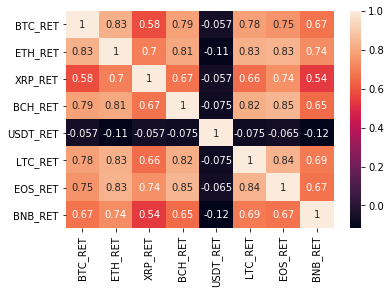

In [75]:
sn.heatmap(CORELATION, annot=True)

Off all the currencies chosen above USDT has bad correlation with all other currencies.
Ethereum has the best correlation with the other currencies, i.e, Litecoin and Bitcoin.

We will analyse more on the correlation between BTC and ETH.

In [76]:
BTC.to_csv(r'.\BTC.csv',index='Date')
btc = pd.read_csv("./BTC.csv")

ETH.to_csv(r'.\ETH.csv',index='Date')
eth = pd.read_csv("./ETH.csv")

In [77]:
#lets save other files too
XRP.to_csv(r'.\XRP.csv',index='Date')
xrp = pd.read_csv("./XRP.csv")

BCH.to_csv(r'.\BCH.csv',index='Date')
bch = pd.read_csv("./BCH.csv")

USDT.to_csv(r'.\USDT.csv',index='Date')
usdt = pd.read_csv("./USDT.csv")

LTC.to_csv(r'.\LTC.csv',index='Date')
ltc = pd.read_csv("./LTC.csv")

EOS.to_csv(r'.\EOS.csv',index='Date')
eos = pd.read_csv("./EOS.csv")

BNB.to_csv(r'.\BNB.csv',index='Date')
bnb = pd.read_csv("./BNB.csv")

In [78]:
btc

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4.324201e+09,3843.520020
1,2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5.244857e+09,3943.409424
2,2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4.530215e+09,3836.741211
3,2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4.847965e+09,3857.717529
4,2019-01-05,3904.903076,3836.900146,3851.973877,3845.194580,5.137610e+09,3845.194580
...,...,...,...,...,...,...,...
724,2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500
725,2020-12-30,28937.740234,27360.089844,27360.089844,28840.953125,5.128744e+10,28840.953125
726,2020-12-31,29244.876953,28201.992188,28841.574219,29001.720703,4.675496e+10,29001.720703
727,2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,4.073030e+10,29374.152344


In [79]:
btc.shape

(729, 7)

In [80]:
eth.shape

(729, 7)

In [83]:
df2 = pd.concat([btc['Date'],btc['Adj Close']], ignore_index=False,axis=1)
df2 = pd.concat([df2,eth['Adj Close'],eth['Date']], ignore_index=False,axis=1)


#check for NAs
#df4= df2.dropna(axis=1,how='any')

#change column names
df2.columns = ['Date', 'btc', 'eth','Date2']

In [84]:
df2.set_index('Date2')

,Date,btc,eth
Date2,,,
2019-01-01,2019-01-01,3843.520020,140.819412
2019-01-02,2019-01-02,3943.409424,155.047684
2019-01-03,2019-01-03,3836.741211,149.135010
2019-01-04,2019-01-04,3857.717529,154.581940
2019-01-05,2019-01-05,3845.194580,155.638596
...,...,...,...
2020-12-29,2020-12-29,27362.437500,731.520142
2020-12-30,2020-12-30,28840.953125,751.618958
2020-12-31,2020-12-31,29001.720703,737.803406


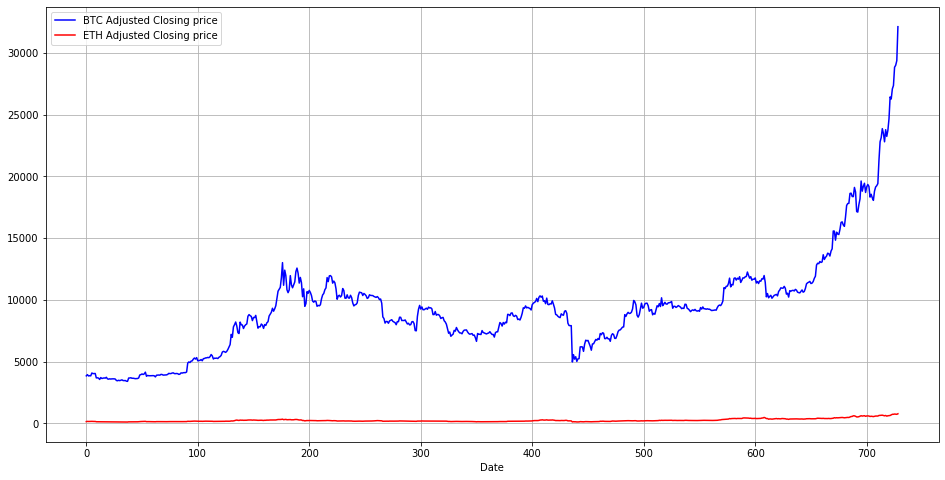

In [85]:
#plotting

plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(df2['btc'],color='blue',  label='BTC Adjusted Closing price')
plt.plot(df2['eth'],color='red',  label='ETH Adjusted Closing price')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

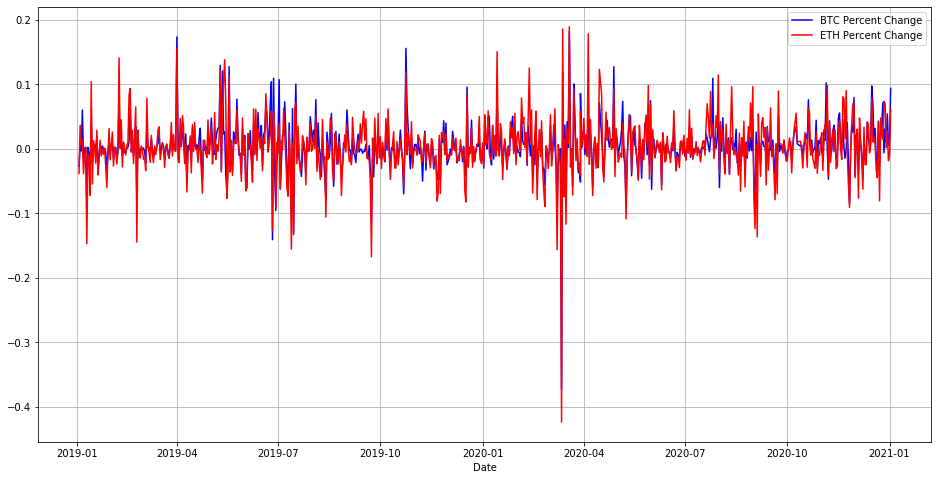

In [86]:
#plot the return values
plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(dt['BTC_RET'],color='blue',  label='BTC Percent Change')
plt.plot(dt['ETH_RET'],color='red',  label='ETH Percent Change')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

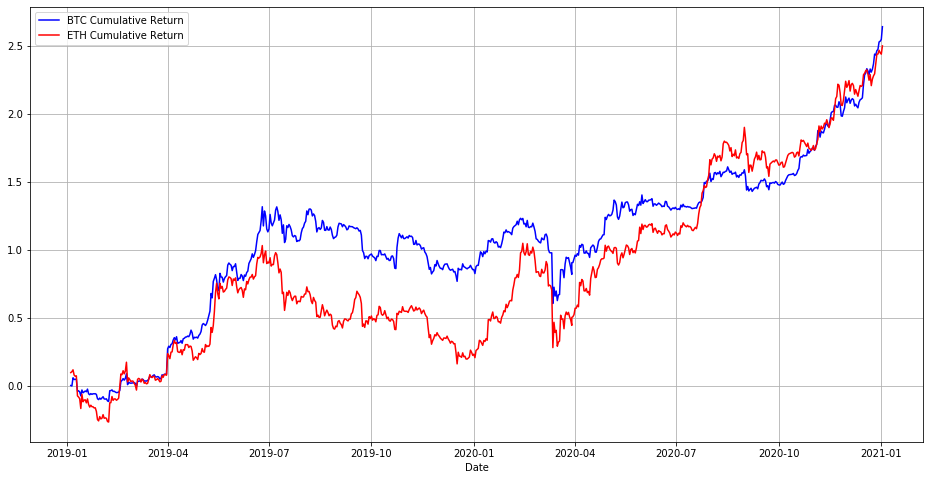

In [87]:
#plot the return values
plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(dtc['BTC_C.RET'],color='blue',  label='BTC Cumulative Return')
plt.plot(dtc['ETH_C.RET'],color='red',  label='ETH Cumulative Return')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

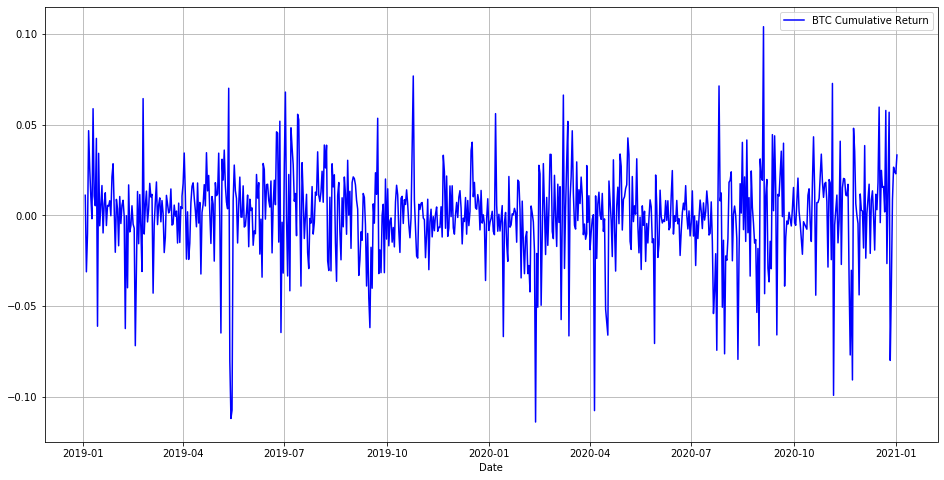

In [88]:
BTC_ETH = dt['BTC_RET'] - dt['ETH_RET']

plt.figure(figsize=(16,8))
ax = plt.axes()
plt.plot(BTC_ETH,color='blue',  label='BTC Cumulative Return')
plt.xlabel("Date")

ax.grid(True)
plt.legend(loc='best')
plt.show()

In [97]:
BTC_DATA = pd.concat([btc['Date'],btc['Adj Close']], ignore_index=False,axis=1)

In [100]:
BTC_DATA.set_index('Date', inplace = True)

In [101]:
BTC_DATA.columns = ['BTC_Close']

In [102]:
BTC_DATA

,BTC_Close
Date,
2019-01-01,3843.520020
2019-01-02,3943.409424
2019-01-03,3836.741211
2019-01-04,3857.717529
2019-01-05,3845.194580
...,...
2020-12-29,27362.437500
2020-12-30,28840.953125
2020-12-31,29001.720703


In [103]:
#Lets split the dataset into train and test dataset
BTC_train = BTC_DATA[:500]
BTC_test = BTC_DATA[500:]

Lets Implement LSTM on this Dataset

In [112]:
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(BTC_DATA)
scaled_data.shape

(729, 1)

In [110]:
#setting training and testing data

x_train, y_train = [], []
for i in range(80,len(BTC_train)):
    x_train.append(scaled_data[i-80:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train[1])
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_train.shape

[0.0189342  0.01522113 0.01595131 0.01551539 0.02357163 0.02178297
 0.02197789 0.02213274 0.00972761 0.01002144 0.00911415 0.00534261
 0.01067191 0.00804808 0.00889505 0.00971506 0.00899365 0.01145569
 0.00701557 0.00614599 0.00713962 0.00646243 0.00701042 0.00697214
 0.00706594 0.00642215 0.00247073 0.00169332 0.00301833 0.00203013
 0.00307972 0.00423246 0.00224667 0.00207751 0.00232826 0.00049764
 0.         0.00930488 0.00945885 0.0101197  0.00866614 0.00884359
 0.00809665 0.0075679  0.0077047  0.00801718 0.00955049 0.01797015
 0.01906247 0.02089784 0.01930696 0.02109646 0.02586537 0.01430516
 0.0168208  0.01583436 0.01571912 0.01584924 0.01601627 0.01618444
 0.01558435 0.01260401 0.01729695 0.01756038 0.0178229  0.01746253
 0.01962706 0.0192193  0.0176051  0.01774186 0.01765696 0.01827141
 0.01954342 0.02260021 0.02178229 0.02203565 0.02338218 0.02394909
 0.02192494 0.02173841]


(420, 80, 1)